## TP2

#### Question 1

In [1]:
%%file f1.m
function [p, E]=f1(x, f)
    n =size(x,2);
    A = zeros(n, n);
    b = zeros(n, 1);
    %regarder fonction vander pour faire la matrice de vandermonde
    for (i=1:n)
        b(i)=f(x(i));
        for (j=1:n)
            if (j ~=n)
                A(i, n-j)=x(i).^(j-1);
            else 
                A(i,j)=(-1)^i;
            end
        end
    end
    res = linsolve(A, b);
    p = res(1:(end-1));
    E = res(end);
end

### Question 2

In [2]:
% afficher pour les différentes valeurs de n du sujet

In [3]:
n = 3;
pas = 1/(n+2);
x = 0:pas:1;
pts_av = 0:pas:1;
new_pas = 1e-6;
inter = 0:new_pas:1;
f = @(x) sqrt(x);

In [4]:
[p_n_av, E] = f1(x, f);
len = length(x);

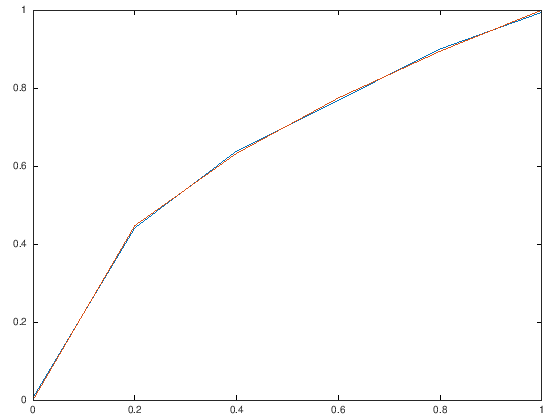

In [6]:
pol_av = polyval(p_n_av, x);
plot(x, pol_av)
hold on
plot(x, f(x))

In [15]:
%%file Remez.m
function [E, pts] = Remez(n, f, pts, inter)
    q = 1e-3;
    a = min(inter);
    b = max(inter);
    [p_n e] = f1(pts,f);
    E = [e];
    pol = polyval(p_n, inter);
    pol2 = polyval(p_n, pts);
    [M, ind_x_sec] = max(abs(f(inter)-pol)) %LIGNE 10
    x_sec = inter(ind_x_sec)
    i =1;
    l = length(pts);
    
    while (i+1)<=l
        if (pts(i)<= x_sec) && (pts(i+1) >= x_sec)
            sgn = sign(f(x_sec)-pol(ind_x_sec));
            sgn_i = sign(f(pts(i)) - pol2(i));
            if (sgn == sgn_i)
                pts(i) = x_sec; % LIGNE 20
            else 
                pts(i+1) = x_sec;
            end 
            break
        else 
            i = i+1;
        end
    end 
    
    pts; %LIGNE 30
    [p_n e] = f1(pts, f);
    E = [E e];
    pol = polyval(p_n, inter);
    pol2 = polyval(p_n, pts);
    [M, ind_x_sec] = max(abs(f(inter)-pol));
    x_sec = inter(ind_x_sec);
    cmpt = 1;
    
    
    while ((min(abs(pts - x_sec)) >= q) && (abs(E(end-1) - E(end)) > q)) & cmpt < 10 %LIGNE 40
        i = 1;
        sgn = sign(f(x_sec)- pol(ind_x_sec));
        if (a <=x_sec) & (x_sec <pts(1))
            if (sgn == sign(f(pts(1)) - pol2(1)))
                pts(1) = x_sec;
            else 
                pts = [x_sec, pts(1:(end-1))];
            end
        elseif ((pts(n+2) < x_sec) && (x_sec <= b)) 
            if (sgn == sign(f(pts(n+2)) - pol2(n+2))) %LIGNE 50
                pts(n+2) = x_sec;
            else 
                pts = [pts(2:end), x_sec];
            end
        else 
            while (i+1)<=l
                if (pts(i)<= x_sec) && (pts(i+1) >= x_sec)
                    sgn_i = sign(f(pts(i)) - pol2(i));
                    if (sgn == sgn_i)
                        pts(i) = x_sec; % LIGNE 60
                    else 
                        pts(i+1) = x_sec;
                    end 
                    break
                else
                    i = i+1;
                end
            end
        end
        [p_n e] = f1(pts, f); % LIGNE 70
        E = [E e];
        pol = polyval(p_n, inter);
        pol2 = polyval(p_n, pts);
        [M, ind_x_sec] = max(abs(f(inter)-pol));
        x_sec = inter(ind_x_sec);
        cmpt = cmpt +1;
    end
    %out = [E, pts];
end

Created file '/mnt/nfs/etu/p1925345/M1/Matlab/Remez.m'.


In [16]:
[E, pts_ap] = Remez(n,f, pts_av, inter);

M =  0.077152
ind_x_sec =  31578
x_sec =  0.031577
    Remez at line 75 column 14


p_n_ap =

   -6.290261
   13.857162
  -10.458490
    3.824663
    0.033463

pol_ap =

   0.033463   0.480849   0.615798   0.741134   0.918136   0.966537

pol_av =

   0.0057920   0.4414216   0.6382475   0.7688047   0.9002192   0.9942080



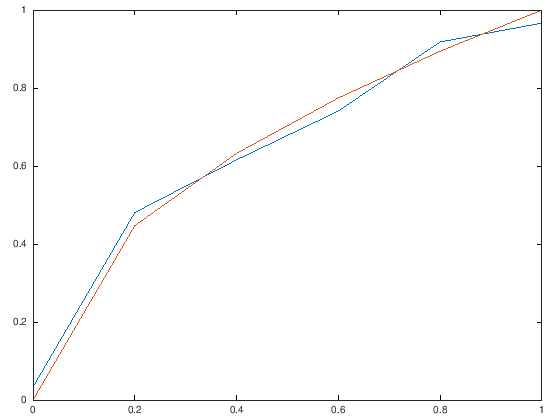

In [17]:
p_n_ap = f1(pts_ap, f)
pol_ap = polyval(p_n_ap, x)
pol_av
plot(x, pol_ap)
hold on
plot(x, f(x))

In [10]:
pas2 = 2/(n+2);
y = -1:pas2:1;
g = @(x) abs(x);

In [11]:
res2 = f1(y, g, n)

In [12]:
P = @(x) x.^n;

In [13]:
%fct = P(y,n);
res3 = f1(y, P, n)

#### Question 3

In [14]:
E = [];
for k=1:n
    res = f1(x, f, k);
    E = [E abs(res(end))];
end

In [15]:
stem(E)